# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308860,0.496087,0.259654,0.275845,0.171676,0.278926,0.410143,0.442838,0.361775,0.371302
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [7]:
data.race.unique()

array(['w', 'b'], dtype=object)

In [8]:
data.call.unique()

array([ 0.,  1.])

In [9]:
# number of callbacks for non black-sounding names
sum(data[data.race=='w'].call)

235.0

In [10]:
len(data[data.race=='w'])

2435

In [11]:
len(data[data.race=='b'])

2435

In [12]:
len(data)

4870

### 1. What test is appropriate for this problem? Does CLT apply?

In this problem we are going to analyze the results for two different populations, black and white subjects. Each population has a different rate of callbacks and we want to check if this difference that is suspected to be caused by their heritage () has a statistical significance. So for this problem is more suitable to use a two-variable bootstrap test.

###    2. What are the null and alternate hypotheses?

In [13]:
# ratio of callbacks for each heritage

call_b = np.sum(data[data.race=='b'].call) / len(data[data.race=='b'])
call_w = np.sum(data[data.race=='w'].call) / len(data[data.race=='w'])
call_diff = call_w - call_b
call_all = np.sum(data.call) / len(data)
print("Black people have a callback rate of {:.3}%.\nWhite people have a callback rate of {:.3}%."\
      .format(call_b*100, call_w*100))
print("The total population callback rate is {:.3}%.".format(call_all*100))
print("Between black and white populations there seems to be, in favor of whites, \
a call back difference of {:.3} points.".format(call_diff*100))

Black people have a callback rate of 6.45%.
White people have a callback rate of 9.65%.
The total population callback rate is 8.05%.
Between black and white populations there seems to be, in favor of whites, a call back difference of 3.2 points.


**Null hypothesis:** there is no statistically significant difference between black and white people callback rate due to their heritage.

**Alternate hypothesis:** callback rate is heritage name dependent.

A p-value below 0.05 rejects the hypothesis.

### 3. Compute margin of error, confidence interval, and p-value.

For our hypotesis test, we are going to make bootstrap replicates of the callback rate difference between white and black subjects. 

In [14]:
#Black callback vector
b_vec = data[data.race=='b'].call
#White callback vector
w_vec = data[data.race=='w'].call
#Concatenation
all_vec = np.concatenate((b_vec, w_vec))
#100000 bootstrap replicates
n = 100000 # number of bootstraps replicates
bs_rep = np.empty(n)
np.random.seed(42) # set seed for random permutations
for i in range(n):
    permut = np.random.permutation(all_vec)
    #re-assign to black and white
    new_b = permut[:len(b_vec)]
    new_w = permut[len(b_vec):]
    #new call back rates
    b_rate = np.sum(new_b) / len(new_b)
    w_rate = np.sum(new_w) / len(new_w)
    #difference
    bs_rep[i] = w_rate - b_rate 

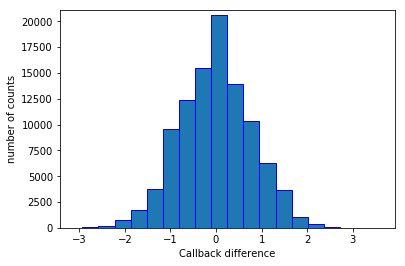

In [15]:
import matplotlib.pyplot as plt
#histogram plot of the replicates
_ = plt.hist(bs_rep*100, bins=20, edgecolor='b')
_ = plt.xlabel('Callback difference')
_ = plt.ylabel('number of counts')
plt.margins(0.02)
plt.show()

In [16]:
#95% confdence interval
inter_95 = np.percentile(bs_rep, [2.5, 97.5])
print("The 95% confidence interval on the callback difference rate \nbetween white and black candidates \
is between {:.3} and {:.3} points.".format(inter_95[0]*100, inter_95[1]*100))

The 95% confidence interval on the callback difference rate 
between white and black candidates is between -1.56 and 1.56 points.


In [25]:
#p-value
p = np.sum(np.abs(bs_rep) >= call_diff) / len(bs_rep)
print("The p-value is: {:.6}".format(p))

The p-value is: 4e-05


The p-value being below the threshold set for the null hypothesis to be valid. The null hypothesis is rejected, then we conclude that there is a statistical difference between the callback rate to candidates as a function of their heritage name. This means that having a name associated with black heritage negatively influences if a candidate is called after a job application.

### 4. Write a story describing the statistical significance in the context or the original problem.

In the presented data, we see a difference in the number of callbacks as a function of race. A CV with a black heritage name has a 6.45% chance of receiving a callback while the same CV with a white heritage name has 9.65% chance of getting a callback.

The difference of 3.2 points in the callback rate we encountered is a reflection of the current data but it doesn't mean that it translates to the whole population. For this reason we decided to reproduce the experiment a hundred thousand times using bootstrap.  This method randomly takes samples from the current data in order to simulate a new data set with same size as the original to calculate again the difference in callback rate between both populations. Using this method we realize that the probability of finding again a difference of 3.2 points is almost zero. So we can ascertain that there is no statiscal significance on the difference in callback rates between black and white populations found in the original data.

Then, for the reasons cited above, we conclude that the race is not a factor affecting the chance of a CV's callback. 

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

In our analysis, done with a two-sample test on the callback rate, a low p-value was found. This p-value indicates that there is not statistical difference between the callbacks to white and black candidates. So, race/name is not the most important factor in callback succes.

To amend our analysis, we need to start considering other variables that may affect the callback rate such as education, years of experience. Also it would be interesting to do the same analysis by location.